In [1]:
from IPython.core.interactiveshell import InteractiveShell

# Display outputs from all lines when they exist
InteractiveShell.ast_node_interactivity = "all" # "last"

import pandas as pd

pd.set_option('max_columns', None)

# Import all data

## Import base data

In [2]:
import pandas as pd

# Read from CSV
posts_2018_df = pd.read_csv("2018_posts.csv")
comms_2018_df = pd.read_csv("2018_comments.csv")
posts_2019_df = pd.read_csv("2019_posts.csv")
comms_2019_df = pd.read_csv("2019_comments_partial.csv")

print(posts_2018_df.shape, comms_2018_df.shape)
print(posts_2019_df.shape, comms_2019_df.shape)

/home/cephcyn/miniconda3/envs/cs6742_a2/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (1,3,36,39,41,42,43,45,47,48,51,52,54,56,58,59,60,62,64,65,68,69,71,72,74,83,84,86,87,88,89,90,91,94,95,99,102,103,104,105,107,110,114,115,117,120,124,125,126,128,130,131) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/cephcyn/miniconda3/envs/cs6742_a2/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (8,11,27,28,29,31,32,36,37,38) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/cephcyn/miniconda3/envs/cs6742_a2/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (1,6,20,44,56,57,64,66,67,68,75,77,79,80,81,82,84,86,87,88,89,92,93,94) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj

(17598, 132) (448947, 40)
(244595, 95) (1716502, 46)


In [3]:
posts_df = posts_2018_df.append(posts_2019_df).reset_index(drop=True)
comms_df = comms_2018_df.append(comms_2019_df).reset_index(drop=True)

print(posts_df.shape)
print(comms_df.shape)

(262193, 146)
(2165449, 48)


## Filter for posts that use bot judgement tags

In [4]:
posts_df[posts_df['id']=='9zgc4m'] # the ID of the first bot implementation announcement

# only include posts AFTER that announcement cutoff
posts_df = posts_df[posts_df['created_utc'] > posts_df[posts_df['id']=='9zgc4m'].iloc[0]['created_utc']].reset_index(drop=True)
print(posts_df.shape)

# and cut down the comments df to only include data for posts within that dataset, while we're at it
comms_df = comms_df[comms_df['link_id'].apply(lambda x: str(x)[3:]).isin(posts_df['id'])].reset_index(drop=True)
print(comms_df.shape)

,author,author_flair_css_class,author_flair_text,brand_safe,can_mod_post,contest_mode,created_utc,domain,full_link,id,is_crosspostable,is_reddit_media_domain,is_self,is_video,locked,num_comments,num_crossposts,over_18,parent_whitelist_status,permalink,pinned,retrieved_on,score,selftext,spoiler,stickied,subreddit,subreddit_id,subreddit_type,suggested_sort,thumbnail,title,url,whitelist_status,thumbnail_height,thumbnail_width,link_flair_text,banned_by,edited,media.oembed.description,media.oembed.height,media.oembed.html,media.oembed.provider_name,media.oembed.provider_url,media.oembed.thumbnail_height,media.oembed.thumbnail_url,media.oembed.thumbnail_width,media.oembed.title,media.oembed.type,media.oembed.version,media.oembed.width,media.type,media_embed.content,media_embed.height,media_embed.scrolling,media_embed.width,secure_media.oembed.description,secure_media.oembed.height,secure_media.oembed.html,secure_media.oembed.provider_name,secure_media.oembed.provider_url,secure_media.oembed.thumbnail_height,secure_media.oembed.thumbnail_url,secure_media.oembed.thumbnail_width,secure_media.oembed.title,secure_media.oembed.type,secure_media.oembed.version,secure_media.oembed.width,secure_media.type,secure_media_embed.content,secure_media_embed.height,secure_media_embed.media_domain_url,secure_media_embed.scrolling,secure_media_embed.width,link_flair_css_class,post_hint,preview.enabled,preview.images,author_flair_richtext,author_flair_type,link_flair_richtext,link_flair_text_color,link_flair_type,rte_mode,author_flair_background_color,author_flair_text_color,media.oembed.author_name,media.oembed.author_url,secure_media.oembed.author_name,secure_media.oembed.author_url,link_flair_background_color,link_flair_template_id,author_cakeday,gilded,send_replies,no_follow,subreddit_subscribers,crosspost_parent,crosspost_parent_list,is_original_content,wls,pwls,media_only,author_id,is_meta,archived,author_created_utc,author_flair_template_id,author_fullname,author_patreon_flair,can_gild,category,content_categories,distinguished,hidden,is_robot_indexable,media,quarantine,removal_reason,secure_media,subreddit_name_prefixed,gildings.gid_1,gildings.gid_2,gildings.gid_3,all_awardings,allow_live_comments,awarders,total_awards_received,treatment_tags,upvote_ratio,author_premium,removed_by_category,updated_utc,preview.reddit_video_preview.dash_url,preview.reddit_video_preview.duration,preview.reddit_video_preview.fallback_url,preview.reddit_video_preview.height,preview.reddit_video_preview.hls_url,preview.reddit_video_preview.is_gif,preview.reddit_video_preview.scrubber_media_url,preview.reddit_video_preview.transcoding_status,preview.reddit_video_preview.width,steward_reports,og_description,og_title,removed_by
10541,TheOutrageousClaire,badge,Colo-rectal Surgeon,NaN,False,False,1542909710,self.AmItheAsshole,https://www.reddit.com/r/AmItheAsshole/comment...,9zgc4m,True,False,True,False,False,104,0,False,house_only,/r/AmItheAsshole/comments/9zgc4m/change_is_com...,False,1542909711,1,"We've got 200,000 subscribers now and it feels...",False,False,AmItheAsshole,t5_2xhvq,public,NaN,self,Change is coming....,https://www.reddit.com/r/AmItheAsshole/comment...,house_only,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],text,[],dark,text,NaN,NaN,dark,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True,200579.0,NaN,NaN,False,1.0,1.0,False,NaN,False,NaN,NaN,NaN,t2_7j6x2,False,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(251651, 146)
(1913807, 48)


## Set up meta-information

In [5]:
# Create list of users that should always be filtered out from the counts
restricted_users_list = ['AutoModerator', 'Judgement_Bot_AITA']

# Judgement tags are in {'NTA', 'YTA', 'NAH', 'ESH', 'INFO', 'SHP' (not formal after a certain point but still commonly quoted)}
potential_tags = ['NTA', 'YTA', 'NAH', 'ESH', 'INFO', 'SHP']

## Import filtered/annotated data

In [6]:
import pickle

# Judgement annotation
comms_df = pd.read_csv(f'backup_comms_df.csv')

# Decision annotation with sizefilter
posts_sizefilter_tag_df = pd.read_csv(f'backup_posts_sizefilter_tag_df.csv')
comms_sizefilter_tag_df = pd.read_csv(f'backup_comms_sizefilter_tag_df.csv')
posts_sizefilter_df = pd.read_csv(f'backup_posts_sizefilter_df.csv')
comms_sizefilter_df = pd.read_csv(f'backup_comms_sizefilter_df.csv')

# TODO sentiment contrast analysis import

# Post graphs
with open('backup_gAll.pkl', 'rb') as f:
    gAll = pickle.load(f)
    
# Branchiness annotation
peruserpost_branch_df = pd.read_csv(f'backup_peruserpost_branch_df.csv')

# Correctness annotation
peruserpost_df = pd.read_csv(f'backup_peruserpost_df.csv')

/home/cephcyn/miniconda3/envs/cs6742_a2/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (2,8,11,37,38,41,42,46,47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/cephcyn/miniconda3/envs/cs6742_a2/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (92,109) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/cephcyn/miniconda3/envs/cs6742_a2/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (2,8,11,42,47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## Preview data available

In [7]:
print('posts_df')
posts_df[:2] # all modern posts with full comment data
print('comms_df')
comms_df[:2] # all comments for modern posts

print('posts_sizefilter_df')
posts_sizefilter_df[:2]
print('comms_sizefilter_df')
comms_sizefilter_df[:2]

print('posts_sizefilter_tag_df')
posts_sizefilter_tag_df[:2]
print('comms_sizefilter_tag_df')
comms_sizefilter_tag_df[:2]

# TODO sentiment contrast data

print('peruserpost_branch_df')
peruserpost_branch_df[:2]

print('peruserpost_df')
peruserpost_df[:2]

posts_df


,author,author_flair_css_class,author_flair_text,brand_safe,can_mod_post,contest_mode,created_utc,domain,full_link,id,is_crosspostable,is_reddit_media_domain,is_self,is_video,locked,num_comments,num_crossposts,over_18,parent_whitelist_status,permalink,pinned,retrieved_on,score,selftext,spoiler,stickied,subreddit,subreddit_id,subreddit_type,suggested_sort,thumbnail,title,url,whitelist_status,thumbnail_height,thumbnail_width,link_flair_text,banned_by,edited,media.oembed.description,media.oembed.height,media.oembed.html,media.oembed.provider_name,media.oembed.provider_url,media.oembed.thumbnail_height,media.oembed.thumbnail_url,media.oembed.thumbnail_width,media.oembed.title,media.oembed.type,media.oembed.version,media.oembed.width,media.type,media_embed.content,media_embed.height,media_embed.scrolling,media_embed.width,secure_media.oembed.description,secure_media.oembed.height,secure_media.oembed.html,secure_media.oembed.provider_name,secure_media.oembed.provider_url,secure_media.oembed.thumbnail_height,secure_media.oembed.thumbnail_url,secure_media.oembed.thumbnail_width,secure_media.oembed.title,secure_media.oembed.type,secure_media.oembed.version,secure_media.oembed.width,secure_media.type,secure_media_embed.content,secure_media_embed.height,secure_media_embed.media_domain_url,secure_media_embed.scrolling,secure_media_embed.width,link_flair_css_class,post_hint,preview.enabled,preview.images,author_flair_richtext,author_flair_type,link_flair_richtext,link_flair_text_color,link_flair_type,rte_mode,author_flair_background_color,author_flair_text_color,media.oembed.author_name,media.oembed.author_url,secure_media.oembed.author_name,secure_media.oembed.author_url,link_flair_background_color,link_flair_template_id,author_cakeday,gilded,send_replies,no_follow,subreddit_subscribers,crosspost_parent,crosspost_parent_list,is_original_content,wls,pwls,media_only,author_id,is_meta,archived,author_created_utc,author_flair_template_id,author_fullname,author_patreon_flair,can_gild,category,content_categories,distinguished,hidden,is_robot_indexable,media,quarantine,removal_reason,secure_media,subreddit_name_prefixed,gildings.gid_1,gildings.gid_2,gildings.gid_3,all_awardings,allow_live_comments,awarders,total_awards_received,treatment_tags,upvote_ratio,author_premium,removed_by_category,updated_utc,preview.reddit_video_preview.dash_url,preview.reddit_video_preview.duration,preview.reddit_video_preview.fallback_url,preview.reddit_video_preview.height,preview.reddit_video_preview.hls_url,preview.reddit_video_preview.is_gif,preview.reddit_video_preview.scrubber_media_url,preview.reddit_video_preview.transcoding_status,preview.reddit_video_preview.width,steward_reports,og_description,og_title,removed_by
0,hshsvdhsiabs,NaN,NaN,NaN,False,False,1542909884,self.AmItheAsshole,https://www.reddit.com/r/AmItheAsshole/comment...,9zgd5n,True,False,True,False,False,10,0,False,house_only,/r/AmItheAsshole/comments/9zgd5n/wibta_for_not...,False,1542909885,1,I had this best friend in high school and we b...,False,False,AmItheAsshole,t5_2xhvq,public,NaN,self,WIBTA for not responding to an ex friends nice...,https://www.reddit.com/r/AmItheAsshole/comment...,house_only,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],text,[],dark,text,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True,200588.0,NaN,NaN,False,1.0,1.0,False,NaN,False,NaN,NaN,NaN,t2_1m2ny8mg,False,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ilikeallburgers,NaN,NaN,NaN,False,False,1542910040,self.AmItheAsshole,https://www.reddit.com/r/AmItheAsshole/comment...,9zge0j,True,False,True,False,False,8,0,False,house_only,/r/AmItheAsshole/comments/9zge0j/aita_for_not_...,False,1542910040,1,My cousin and her fiance are getting married i...,False,False,AmItheAsshole,t5_2xhvq,publi

comms_df


,approved_at_utc,author,author_flair_css_class,author_flair_text,banned_at_utc,body,can_mod_post,collapsed,collapsed_reason,created_utc,distinguished,edited,id,is_submitter,link_id,parent_id,permalink,retrieved_on,score,stickied,subreddit,subreddit_id,author_cakeday,author_flair_background_color,author_flair_richtext,author_flair_text_color,author_flair_type,no_follow,rte_mode,send_replies,author_flair_template_id,author_id,author_fullname,gildings.gid_1,gildings.gid_2,gildings.gid_3,author_patreon_flair,all_awardings,locked,total_awards_received,associated_award,author_premium,awarders,collapsed_because_crowd_control,comment_type,top_awarded_type,treatment_tags,steward_reports,judgement_tag
0,NaN,AutoModerator,NaN,NaN,NaN,^^^^AUTOMOD ***This is a copy of the above po...,False,False,NaN,1542909885,moderator,False,ea8xh7v,False,t3_9zgd5n,t3_9zgd5n,/r/AmItheAsshole/comments/9zgd5n/wibta_for_not...,1.542910e+09,1.0,False,AmItheAsshole,t5_2xhvq,NaN,NaN,[],NaN,text,True,NaN,False,NaN,NaN,t2_6l4z3,0.0,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,ursa-majcr,NaN,NaN,NaN,"NTA. you don’t owe her anything, certainly not...",False,False,NaN,1542910265,NaN,False,ea8xxe0,False,t3_9zgd5n,t3_9zgd5n,/r/AmItheAsshole/comments/9zgd5n/wibta_for_not...,1.542910e+09,1.0,False,AmItheAsshole,t5_2xhvq,NaN,NaN,[],NaN,text,True,NaN,True,NaN,NaN,t2_17d1fuhb,0.0,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NTA


posts_sizefilter_df


,author,author_flair_css_class,author_flair_text,brand_safe,can_mod_post,contest_mode,created_utc,domain,full_link,id,is_crosspostable,is_reddit_media_domain,is_self,is_video,locked,num_comments,num_crossposts,over_18,parent_whitelist_status,permalink,pinned,retrieved_on,score,selftext,spoiler,stickied,subreddit,subreddit_id,subreddit_type,suggested_sort,thumbnail,title,url,whitelist_status,thumbnail_height,thumbnail_width,link_flair_text,banned_by,edited,media.oembed.description,media.oembed.height,media.oembed.html,media.oembed.provider_name,media.oembed.provider_url,media.oembed.thumbnail_height,media.oembed.thumbnail_url,media.oembed.thumbnail_width,media.oembed.title,media.oembed.type,media.oembed.version,media.oembed.width,media.type,media_embed.content,media_embed.height,media_embed.scrolling,media_embed.width,secure_media.oembed.description,secure_media.oembed.height,secure_media.oembed.html,secure_media.oembed.provider_name,secure_media.oembed.provider_url,secure_media.oembed.thumbnail_height,secure_media.oembed.thumbnail_url,secure_media.oembed.thumbnail_width,secure_media.oembed.title,secure_media.oembed.type,secure_media.oembed.version,secure_media.oembed.width,secure_media.type,secure_media_embed.content,secure_media_embed.height,secure_media_embed.media_domain_url,secure_media_embed.scrolling,secure_media_embed.width,link_flair_css_class,post_hint,preview.enabled,preview.images,author_flair_richtext,author_flair_type,link_flair_richtext,link_flair_text_color,link_flair_type,rte_mode,author_flair_background_color,author_flair_text_color,media.oembed.author_name,media.oembed.author_url,secure_media.oembed.author_name,secure_media.oembed.author_url,link_flair_background_color,link_flair_template_id,author_cakeday,gilded,send_replies,no_follow,subreddit_subscribers,crosspost_parent,crosspost_parent_list,is_original_content,wls,pwls,media_only,author_id,is_meta,archived,author_created_utc,author_flair_template_id,author_fullname,author_patreon_flair,can_gild,category,content_categories,distinguished,hidden,is_robot_indexable,media,quarantine,removal_reason,secure_media,subreddit_name_prefixed,gildings.gid_1,gildings.gid_2,gildings.gid_3,all_awardings,allow_live_comments,awarders,total_awards_received,treatment_tags,upvote_ratio,author_premium,removed_by_category,updated_utc,preview.reddit_video_preview.dash_url,preview.reddit_video_preview.duration,preview.reddit_video_preview.fallback_url,preview.reddit_video_preview.height,preview.reddit_video_preview.hls_url,preview.reddit_video_preview.is_gif,preview.reddit_video_preview.scrubber_media_url,preview.reddit_video_preview.transcoding_status,preview.reddit_video_preview.width,steward_reports,og_description,og_title,removed_by,final_judgement,controversialness,controversialness_distrib
0,ThatIsANopeToThat,NaN,NaN,NaN,False,False,1542911466,self.AmItheAsshole,https://www.reddit.com/r/AmItheAsshole/comment...,9zglje,True,False,True,False,False,146,0,False,house_only,/r/AmItheAsshole/comments/9zglje/aita_for_lett...,False,1542911467,1,"I am a law abiding citizen, always have been a...",False,False,AmItheAsshole,t5_2xhvq,public,top,self,AITA for letting a friend know that their grou...,https://www.reddit.com/r/AmItheAsshole/comment...,house_only,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],text,[],dark,text,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True,200625.0,NaN,NaN,False,1.0,1.0,False,NaN,False,NaN,NaN,NaN,t2_2nd211bo,False,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,YTA,0.555556,"(10, 26, 0, 0, 0)"
1,CheesecakeTummyache,NaN,NaN,NaN,False,False,1542921448,self.AmItheAsshole,https://www.reddit.com/r/AmItheAsshole/comment...,9zi2oe,True,False,True,False,False,124,0,False,house_only,/r/AmItheAsshole/comments/9zi2oe/aita_for_not_...,Fa

comms_sizefilter_df


,approved_at_utc,author,author_flair_css_class,author_flair_text,banned_at_utc,body,can_mod_post,collapsed,collapsed_reason,created_utc,distinguished,edited,id,is_submitter,link_id,parent_id,permalink,retrieved_on,score,stickied,subreddit,subreddit_id,author_cakeday,author_flair_background_color,author_flair_richtext,author_flair_text_color,author_flair_type,no_follow,rte_mode,send_replies,author_flair_template_id,author_id,author_fullname,gildings.gid_1,gildings.gid_2,gildings.gid_3,author_patreon_flair,all_awardings,locked,total_awards_received,associated_award,author_premium,awarders,collapsed_because_crowd_control,comment_type,top_awarded_type,treatment_tags,steward_reports,judgement_tag,judgement_correct
0,NaN,AutoModerator,NaN,NaN,NaN,^^^^AUTOMOD ***This is a copy of the above po...,False,False,NaN,1542911466,moderator,False,ea8zbp2,False,t3_9zglje,t3_9zglje,/r/AmItheAsshole/comments/9zglje/aita_for_lett...,1.542911e+09,1.0,False,AmItheAsshole,t5_2xhvq,NaN,NaN,[],NaN,text,True,NaN,False,NaN,NaN,t2_6l4z3,0.0,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,ButtStuffJR,badge,Certified Proctologist,NaN,"I understand you don't want to go into detail,...",False,False,NaN,1542911661,NaN,False,ea8zjhn,False,t3_9zglje,t3_9zglje,/r/AmItheAsshole/comments/9zglje/aita_for_lett...,1.542912e+09,1.0,False,AmItheAsshole,t5_2xhvq,NaN,NaN,[],dark,text,True,NaN,True,NaN,NaN,t2_23lg4kgq,0.0,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,YTA,1.0


posts_sizefilter_tag_df


,id,final_judgement,controversialness,controversialness_distrib
0,9zglje,YTA,0.555556,"(10, 26, 0, 0, 0)"
1,9zi2oe,NTA,0.210526,"(51, 6, 0, 0, 0)"


comms_sizefilter_tag_df


,link_id,id,judgement_correct
0,t3_9zglje,ea8zjhn,1.0
1,t3_9zglje,ea8zmtl,1.0


peruserpost_branch_df


,id,author,branch_count,branch_branchiness,branch_degree_avg,branch_degree_med,comment_count
0,t3_9zglje,AutoModerator,1,1.0,1.0,1.0,1
1,t3_9zglje,ButtStuffJR,2,1.0,2.0,2.0,2


peruserpost_df


,id,author,general_judgement_correct
0,t3_9zglje,AutoModerator,NaN
1,t3_9zglje,ButtStuffJR,1.0


# Comparison: Controversialness vs Buzziness (Branchiness)

In [11]:
# Create filtered dataset to avoid graphing stats of filtered-out users and OPs
temp_peruserpost_branch_df = peruserpost_branch_df
temp_peruserpost_branch_df = temp_peruserpost_branch_df[temp_peruserpost_branch_df['author'].apply(
    lambda x: x not in restricted_users_list
)]
temp_peruserpost_branch_df = temp_peruserpost_branch_df[temp_peruserpost_branch_df.apply(
    lambda r: r['author'] != gAll[r['id']]['user_op'],
    axis='columns',
)]
temp_peruserpost_branch_df['id'] = temp_peruserpost_branch_df['id'].apply(lambda x: x[3:])
temp_peruserpost_branch_df[:5]

temp_combined_df = temp_peruserpost_branch_df.merge(posts_sizefilter_tag_df, left_on='id', right_on='id')
temp_combined_df[:5]

,id,author,branch_count,branch_branchiness,branch_degree_avg,branch_degree_med,comment_count
1,9zglje,ButtStuffJR,2,1.000000,2.0,2.0,2
2,9zglje,Basherrr559,1,0.500000,1.0,1.0,2
3,9zglje,Killairmanable,2,0.666667,1.5,1.5,3
4,9zglje,icarebot,1,1.000000,1.0,1.0,1
5,9zglje,Zizzy00,1,1.000000,1.0,1.0,1


,id,author,branch_count,branch_branchiness,branch_degree_avg,branch_degree_med,comment_count,final_judgement,controversialness,controversialness_distrib
0,9zglje,ButtStuffJR,2,1.000000,2.0,2.0,2,YTA,0.555556,"(10, 26, 0, 0, 0)"
1,9zglje,Basherrr559,1,0.500000,1.0,1.0,2,YTA,0.555556,"(10, 26, 0, 0, 0)"
2,9zglje,Killairmanable,2,0.666667,1.5,1.5,3,YTA,0.555556,"(10, 26, 0, 0, 0)"
3,9zglje,icarebot,1,1.000000,1.0,1.0,1,YTA,0.555556,"(10, 26, 0, 0, 0)"
4,9zglje,Zizzy00,1,1.000000,1.0,1.0,1,YTA,0.555556,"(10, 26, 0, 0, 0)"


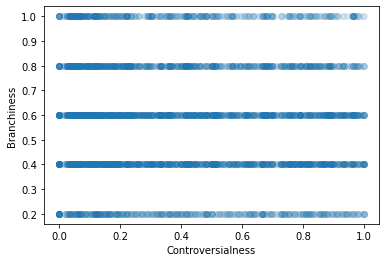

In [17]:
# Plot controversialness vs user buzziness distribution of each post, only counting users with CONST comments in each post
import math
import matplotlib.pyplot as plt
import numpy as np

comment_const = 5

temp_df = temp_combined_df
temp_df = temp_df[temp_df['comment_count']==comment_const]

_ = plt.scatter(
    temp_df['controversialness'], 
    temp_df['branch_branchiness'], 
    alpha=0.05,
)
_ = plt.xlabel('Controversialness')
_ = plt.ylabel('Branchiness')
plt.show()